## Exercise 4: Quantum Noise

Take the program from exercise 3, and modify it to run your circuit on a real quantum computer.

Your results between exercise 3 and 4 should be different, even though the circuit is identical. It’s up to you to understand why.

From there, we strongly advise you to go back to what you have done,
and understand the applied math/vector formulas behind each action,
and test the different existing gates.

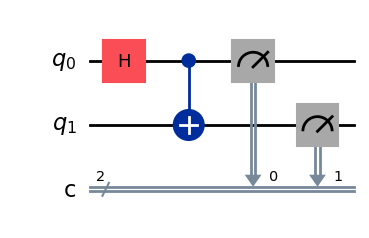

In [1]:
from qiskit import QuantumCircuit

# Create Circuit
qc = QuantumCircuit(2, 2) # 2 qubits, 2 classical bits
qc.h(0)  # Hadamard gate on qubit 0
qc.cx(0, 1) # CNOT gate from qubit 0 to qubit 1
qc.measure(range(2), range(2))  # Measure both qubits

qc.draw(output='mpl')  # Draw the circuit

In [2]:
from sources.QSim import QBackend

counts = QBackend(qc=qc, shots=500)

Counts: {'00': 245, '11': 251, '01': 4}


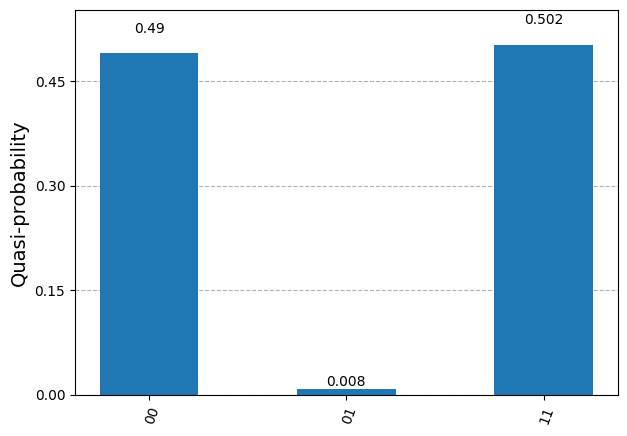

In [5]:
from qiskit.visualization import plot_distribution

plot_distribution(counts)